In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Creating the dataset

Let us start by creating a dataset representing a noisy cubic polynomial with equation $-0.2 x^3 + \mu$, where $\mu \sim \mathcal{N}(0, 2)$

In [21]:
np.random.seed(42)
X = (np.random.rand(100,1) - 0.5) * 10
y = -0.2 * X**3 + np.random.normal(loc=0, scale=2, size=[100,1])

Let's plot it

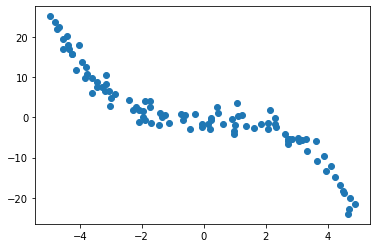

In [3]:
plt.scatter(X,y)

We need the data to be in homogeneous coordinates, so we first define a column vector of ones
$$
\textbf{ones} = \begin{pmatrix}
1 \\
1 \\
\vdots \\
1
\end{pmatrix}
$$
and then we define the homogeneus coordinates matrix
$$
XX = X \; | \; \textbf{ones}
$$

In [22]:
# Define a column array made of only ones
ones = np.ones((len(X),1),  dtype=int)
XX = np.c_[X, ones]

# Define the least square "solver"

Recall from the theory that the least square solver is given by the equation
$$
\hat{w} = (X^T X)^{-1} X^T y
$$

In [40]:
from numpy.linalg import inv

def least_squares(X, y, lam):
    X_t = np.transpose(X)
    Lam = np.eye(len(X_t), len(X_t)) * lam
    X_t_X = np.matmul(X_t, X)
    X_inv = inv(X_t_X + Lam)
    X_t_y = np.matmul(X_t, y)
    return np.matmul(X_inv, X_t_y)

Apply it to our data

In [49]:
ww = least_squares(XX, y, 0)
print(ww)

[[-3.10224715]
 [ 0.06642012]]


It's time to plot results, let start by generating new points in the interval $[-5,5]$ and compute the $y$ using the solution found by least squares.

In [ ]:
xs = np.linspace(-5, 5)


In [ ]:
plt.scatter(X,y)
plt.plot(xs, ys, c='r', lw=2)


# Solving a non-linear problem using the "slow" kernel trick

We will use the sklearn PolynomialFeatures class to preprocess our data mapping them into a "polynomial space". We will need a space able to represent all polynomials of degree 3.

In [ ]:
polyfeatures = ...
polyX = ...

Now we can use our `least_squares` solver to find a solution in the transformed space...

In [ ]:
polyww = least_squares(polyX, y)

Generate new data to plot the solution (again, using `linspace` to generate points in the interval $[-5,5]$).

In [ ]:
xs = np.linspace(-5, 5, 100).reshape(-1,1)
...
polyys = ...

We can now plot the data and our solution

In [ ]:
plt.scatter(X,y)
plt.plot(xs, polyys, c='r',lw=2)